# Tarefa 2 – Titanic Challenge

## 1. Problema

Identificar se o passageiro irá sobreviver ou não.

## 2. Dados

Tirados do desafio do kaggle: https://www.kaggle.com/c/titanic/overview/evaluation

## 3. Avaliação

Acurácia da solução no data set de teste.

## 4. Características

# Setting Workspace

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation
from tensorflow.keras.regularizers import l2
from keras.callbacks import ModelCheckpoint

# Getting the Data Ready

## Studying the data

In [12]:
file = '/content/drive/My Drive/CBPF/Deep Learning/ML Dados/titanic/train.csv'
data = pd.read_csv(file)
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


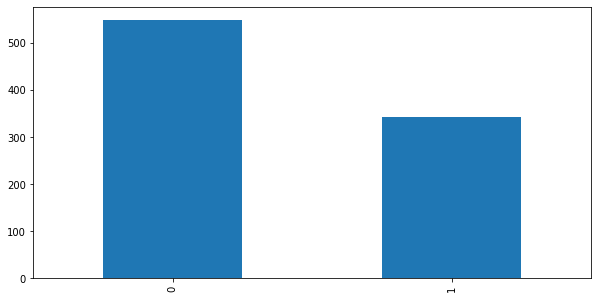

In [3]:
data["Survived"].value_counts().plot.bar(figsize=(10, 5));

In [4]:
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [5]:
data.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

## Treating the data

In [13]:
# Can't resolve this problem with the data in hands
data = data.drop(columns=["Cabin"])

# Substitute the NAN Age with the mean
mean_age = data['Age'].mean()
data['Age'].fillna(value=data['Age'].mean(), inplace=True)

# Can't resolve where those passengers embarked
data = data.dropna()

data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

* Drop NAME
* Transform SEX M/F -> 0/1
* Drop TICKET (number), we already have the Ticket Class
* Tranform EMBARKED into C, Q, S -> 1, 2, 3 ou 0, 0.5, 1

In [14]:
data.drop(columns=['Name', 'Ticket'], inplace=True)

In [15]:
from sklearn import preprocessing

le = preprocessing.LabelEncoder()
data.Sex = le.fit_transform(data.Sex)
data.Embarked = le.fit_transform(data.Embarked)

In [16]:
data.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.0,1,0,7.2500,2
1,2,1,1,0,38.0,1,0,71.2833,0
2,3,1,3,0,26.0,0,0,7.9250,2
3,4,1,1,0,35.0,1,0,53.1000,2
4,5,0,3,1,35.0,0,0,8.0500,2


# Separate Data

In [17]:
# Input features
X = data.drop(columns=['Survived'])
# Target variable
y = data['Survived']

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.20, random_state=0)

# Building Model

In [61]:
NB_EPOCHS = 200
BATCH_SIZE = 32

def model_create():

  model = Sequential()
  model.add(Dense(32, input_dim=8, activation='relu', kernel_initializer='uniform'))
  # Hidden Layer
  model.add(Dense(32, activation='relu', kernel_initializer='uniform'))
  model.add(Dense(16, activation='relu', kernel_initializer='uniform'))
  # Output layer
  model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))

  model.compile(loss='binary_crossentropy', metrics=['accuracy'],optimizer='adam')


  print('Starting model training...')

  out = model.fit(X_train, y_train, 
                  epochs=NB_EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(X_val, y_val),
                  verbose=0)

  return out, model 

In [42]:
out, model = model_create()

Starting model training...


In [43]:
print('Training Loss: ', np.mean(out.history["loss"]))
print('Training Accuracy: ', np.mean(out.history["accuracy"]))
print('=========================')
print('Validation Loss: ', np.mean(out.history["val_loss"]))
print('Validation Accuracy: ', np.mean(out.history["val_accuracy"]))

Training Loss:  0.4386661110818386
Training Accuracy:  0.7958087196946144
Validation Loss:  0.5875379747152328
Validation Accuracy:  0.7176685452461242


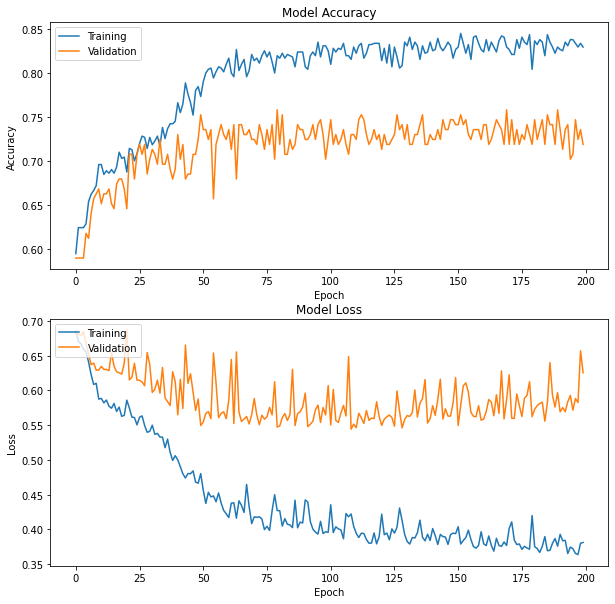

In [44]:
fig, ([ax0, ax1]) = plt.subplots(nrows=2, 
                                ncols=1,
                                figsize=(10,10))

# Add data to ax0
ax0.plot(out.history["accuracy"])
ax0.plot(out.history["val_accuracy"])

# Customize ax0
ax0.set(title="Model Accuracy",
        xlabel="Epoch",
        ylabel="Accuracy");
# Add a legend to ax0
ax0.legend(["Training", "Validation"], loc="upper left");

# Add data to ax1
ax1.plot(out.history["loss"])
ax1.plot(out.history["val_loss"])

# Customize ax0
ax1.set(title="Model Loss",
        xlabel="Epoch",
        ylabel="Loss");
# Add a legend to ax0
ax1.legend(["Training", "Validation"], loc="upper left");

# K-fold Cross-Validation

In [51]:
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import StratifiedKFold
import numpy
# fix random seed for reproducibility
seed = 7
numpy.random.seed(seed)
# # load pima indians dataset
# dataset = numpy.loadtxt("pima-indians-diabetes.csv", delimiter=",")
# # split into input (X) and output (Y) variables
# X = dataset[:,0:8]
# Y = dataset[:,8]
X_np = np.array(X)
y_np = np.array(y)
# define 10-fold cross validation test harness
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed)
cvscores = []
for train, test in kfold.split(X_np, y_np):
  # create model
  model = Sequential()
  model.add(Dense(32, input_dim=8, activation='relu', kernel_initializer='uniform'))
  # Hidden Layer
  model.add(Dense(32, activation='relu', kernel_initializer='uniform'))
  model.add(Dense(16, activation='relu', kernel_initializer='uniform'))
  # Output layer
  model.add(Dense(1, activation='sigmoid', kernel_initializer='uniform'))
  # Compile model
  model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
  # Fit the model
  model.fit(X_np[train], y_np[train], epochs=200, batch_size=32, verbose=0)
  # evaluate the model
  scores = model.evaluate(X_np[test], y_np[test], verbose=0)
  print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
  cvscores.append(scores[1] * 100)
print("%.2f%% (+/- %.2f%%)" % (numpy.mean(cvscores), numpy.std(cvscores)))

accuracy: 84.27%
accuracy: 80.90%
accuracy: 71.91%
accuracy: 76.40%
accuracy: 80.23%
78.74% (+/- 4.23%)


Starting model training...
No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.792


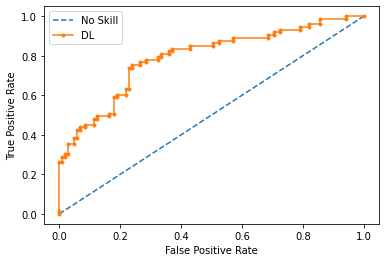

In [62]:
# roc curve and auc
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot


# generate a no skill prediction (majority class)
ns_probs = [0 for _ in range(len(y_val))]

#create and fit a model
out, model = model_create()

# predict probabilities
lr_probs = model.predict(X_val)

# calculate scores
ns_auc = roc_auc_score(y_val, ns_probs)
lr_auc = roc_auc_score(y_val, lr_probs)
# summarize scores
print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))
# calculate roc curves
ns_fpr, ns_tpr, _ = roc_curve(y_val, ns_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_val, lr_probs)
# plot the roc curve for the model
pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='DL')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()